# Gravitational Waves in General Relativity III Exact Plane Waves by Bondi, Pirani, Robinson
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

I messed up... start with the harder metric then reduce.

The following metric is given as equation 2.7 prime which is a special case and reduction of equation 2.7.  We will go back and do the much more difficult metric 2.7 when the hyperbolic trig functions are working 

https://images-insite.sgp1.digitaloceanspaces.com/dunia_buku/koleksi-buku-lainnya/gravitational-waves-in-general-relativity-iii-exact-plane-waves-pdfdrivecom-6291584693555.pdf

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [14]:
eta, phi,beta,tau,xi,beta,zeta,dtau,dxi,dbeta,dzeta,u,du,deta = symbols( 'eta phi beta tau xi beta zeta dtau dxi dbeta dzeta u du deta' ) 

In [5]:
phi = Function('phi')(u)
phi

In [6]:
beta = Function('beta')(u)
beta

In [7]:
theta = Function('theta')(u)
theta

In [34]:
variables = Matrix( [u,tau,eta,zeta] )
variables

⎡u⎤
⎢ ⎥
⎢τ⎥
⎢ ⎥
⎢η⎥
⎢ ⎥
⎣ζ⎦

In [35]:
differentials = Matrix( [du,dtau,deta,dzeta] ) 
differentials

⎡ du  ⎤
⎢     ⎥
⎢dtau ⎥
⎢     ⎥
⎢deta ⎥
⎢     ⎥
⎣dzeta⎦

In [36]:
lineElement = expand((exp(2*phi))*(-dxi**2 + dtau**2 ) -  u**2 * ( exp(2*beta)*deta**2 + exp(-2*beta)*dzeta**2 ))
lineElement

In [37]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡0   0       0          0    ⎤
⎢                            ⎥
⎢    2⋅φ                     ⎥
⎢0  ℯ        0          0    ⎥
⎢                            ⎥
⎢           2  2⋅β           ⎥
⎢0   0    -u ⋅ℯ         0    ⎥
⎢                            ⎥
⎢                     2  -2⋅β⎥
⎣0   0       0      -u ⋅ℯ    ⎦

In [23]:
import sympy

In [24]:
m = sympy.Array(g)
m

⎡  2⋅φ                           ⎤
⎢-ℯ      0       0          0    ⎥
⎢                                ⎥
⎢        2⋅φ                     ⎥
⎢  0    ℯ        0          0    ⎥
⎢                                ⎥
⎢               2  2⋅β           ⎥
⎢  0     0    -u ⋅ℯ         0    ⎥
⎢                                ⎥
⎢                         2  -2⋅β⎥
⎣  0     0       0      -u ⋅ℯ    ⎦

In [25]:
from einsteinpy.symbolic import *

In [26]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [27]:
metric = MetricTensor(m,syms)

In [28]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                     ⎡      1   ⎤  ⎡         1⎤⎤
⎢⎡0  0        0              0       ⎤                ⎢0  0  ─  0⎥  ⎢0  0  0  ─⎥⎥
⎢⎢                                   ⎥  ⎡0  0  0  0⎤  ⎢      u   ⎥  ⎢         u⎥⎥
⎢⎢0  0        0              0       ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢                                   ⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          2⋅β  -2⋅φ                ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  -u⋅ℯ   ⋅ℯ            0       ⎥  ⎢0  0  0  0⎥  ⎢1         ⎥  ⎢0  0  0  0⎥⎥
⎢⎢                                   ⎥  ⎢          ⎥  ⎢─  0  0  0⎥  ⎢          ⎥⎥
⎢⎢                         -2⋅β  -2⋅φ⎥  ⎣0  0  0  0⎦  ⎢u         ⎥  ⎢1         ⎥⎥
⎢⎣0  0        0        -u⋅ℯ    ⋅ℯ    ⎦                ⎢          ⎥  ⎢─  0  0  0⎥⎥
⎣                                                     ⎣0  0  0  0⎦  ⎣u         ⎦⎦

In [29]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡0  0       0            0      ⎤
⎢                               ⎥
⎢0  0       0            0      ⎥
⎢                               ⎥
⎢        2⋅β - 2⋅φ              ⎥
⎢0  0  -ℯ                0      ⎥
⎢                               ⎥
⎢                     -2⋅β - 2⋅φ⎥
⎣0  0       0       -ℯ          ⎦

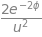

In [31]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [30]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡1.0                                                                     ⎤
⎢───    0                 0                              0               ⎥
⎢  2                                                                     ⎥
⎢ u                                                                      ⎥
⎢                                                                        ⎥
⎢     -1.0                                                               ⎥
⎢ 0   ─────               0                              0               ⎥
⎢        2                                                               ⎥
⎢       u                                                                ⎥
⎢                                                                        ⎥
⎢                 2⋅β  -2⋅φ    2⋅β - 2⋅φ                                 ⎥
⎢ 0     0    1.0⋅ℯ   ⋅ℯ     - ℯ                          0               ⎥
⎢                                                                        ⎥
⎢                        

In [32]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤           ⎡0  0  0  0⎤                      ⎡0  0  0  0⎤        
⎢⎢          ⎥  ⎢          ⎥           ⎢          ⎥                      ⎢          ⎥        
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥           ⎢0  0  0  0⎥                      ⎢0  0  0  0⎥        
⎢⎢          ⎥  ⎢          ⎥           ⎢          ⎥                      ⎢          ⎥        
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥           ⎢0  0  0  0⎥                      ⎢0  0  0  0⎥        
⎢⎢          ⎥  ⎢          ⎥           ⎢          ⎥                      ⎢          ⎥        
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦           ⎣0  0  0  0⎦                      ⎣0  0  0  0⎦        
⎢                                                                                           
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤           ⎡0  0  0  0⎤                      ⎡0  0  0  0⎤        
⎢⎢          ⎥  ⎢          ⎥           ⎢          ⎥                      ⎢          ⎥        
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥           ⎢0  0  0  0⎥                    

In [33]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                         ⎡        2⋅φ       ⎤                                              
⎢                         ⎢      -ℯ          ⎥       ⎡           2⋅β    ⎤         ⎡         
⎢                         ⎢ 0    ──────  0  0⎥       ⎢         -ℯ       ⎥         ⎢         
⎢                         ⎢          2       ⎥       ⎢ 0    0  ──────  0⎥         ⎢  0    0 
⎢     ⎡0  0  0  0⎤        ⎢       3⋅u        ⎥       ⎢           6      ⎥         ⎢         
⎢     ⎢          ⎥        ⎢                  ⎥       ⎢                  ⎥         ⎢         
⎢     ⎢0  0  0  0⎥        ⎢ 2⋅φ              ⎥       ⎢ 0    0    0     0⎥         ⎢  0    0 
⎢     ⎢          ⎥        ⎢ℯ                 ⎥       ⎢                  ⎥         ⎢         
⎢     ⎢0  0  0  0⎥        ⎢────    0     0  0⎥       ⎢ 2⋅β              ⎥         ⎢  0    0 
⎢     ⎢          ⎥        ⎢   2              ⎥       ⎢ℯ                 ⎥         ⎢         
⎢     ⎣0  0  0  0⎦        ⎢3⋅u               ⎥       ⎢────  0    0    